In [1]:
import draw2Svg as dw

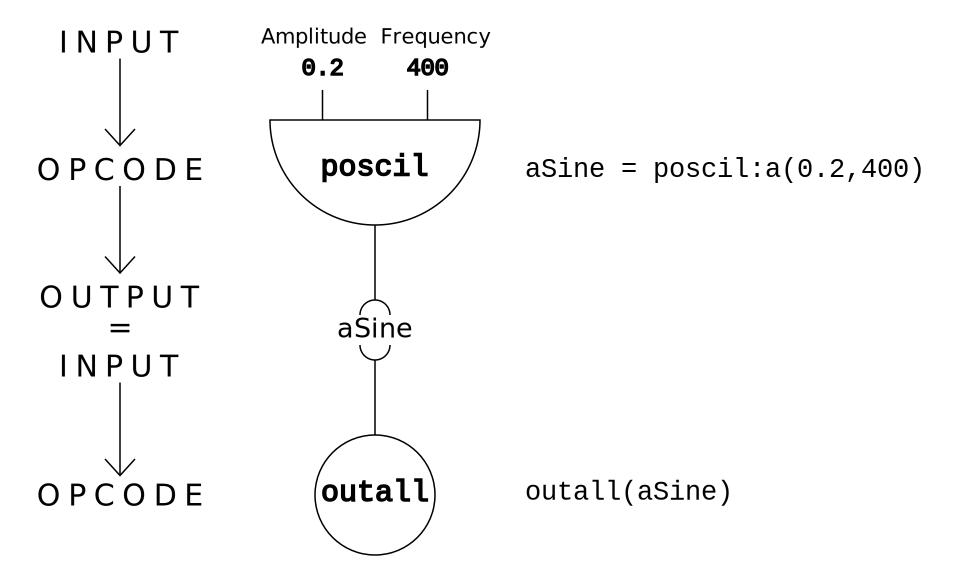

In [9]:
def vert_arrow(x,y1,y2):
    p = dw.Path(stroke='black',fill='none')
    p.M(x,y1)
    p.V(y2)
    p.M(x-10,y2-10)
    p.L(x,y2+1)
    p.L(x+10,y2-10)
    return p

def connect2var(x1,y1,x2,y2,sweep=1,from_top=0.4,arcrad=10):
    """connects to or from a variable name
    x1,y1 is on top"""
    y_dist = y2-y1
    if sweep==1: y2_line = y2-arcrad
    else: y2_line = y2+arcrad
    y_mid = y1 + y_dist*from_top
    p = dw.Path(stroke='black',fill='none')
    p.M(x1,y1)
    p.V(y_mid)
    p.H(x2)
    p.L(x2,y2_line)
    p.M(x2-arcrad,y2)
    p.A(arcrad,arcrad,0,0,sweep,x2+arcrad,y2)
    d.append(p)
    return y_mid


d = dw.Drawing(650,380)

# oscillator
x_osc_top_middle = 250
y_osc_top_middle = 80
r_osc = 70
xpos_amp = x_osc_top_middle - r_osc/2
xpos_freq = x_osc_top_middle + r_osc/2
len_input = 20
d.append(dw.Pie(x_osc_top_middle,y_osc_top_middle,r_osc,0,180,fill='none',stroke='black'))
d.append(dw.Line(xpos_amp,y_osc_top_middle,xpos_amp,y_osc_top_middle-len_input,stroke='black'))
d.append(dw.Line(xpos_freq,y_osc_top_middle,xpos_freq,y_osc_top_middle-len_input,stroke='black'))
d.append(dw.Text('Amplitude',14,xpos_amp,y_osc_top_middle-65,text_anchor='middle',valign='top',dx=-6))
d.append(dw.Text('0.2',16,xpos_amp,y_osc_top_middle-30,text_anchor='middle',style='font-family: courier',stroke='black'))
d.append(dw.Text('Frequency',14,xpos_freq,y_osc_top_middle-65,text_anchor='middle',valign='top',dx=6))
d.append(dw.Text('400',16,xpos_freq,y_osc_top_middle-30,text_anchor='middle',style='font-family: courier',stroke='black'))
d.append(dw.Text('poscil',20,x_osc_top_middle,y_osc_top_middle+37,
                 text_anchor='middle',style='font-family: courier',stroke='black'))

# outall
x_outall_middle = x_osc_top_middle
outall_radius = 40
y_outall_top = y_osc_top_middle + 3*r_osc
y_outall_center =  y_outall_top + outall_radius
d.append(dw.Circle(x_outall_middle,y_outall_center,outall_radius,stroke='black',fill='none'))
d.append(dw.Text('outall',20,x_outall_middle,y_outall_center-4,
                 text_anchor='middle',valign='middle',style='font-family: courier',stroke='black'))

# connection
x_connect = x_osc_top_middle
y_connect_top = y_osc_top_middle + r_osc
y_connect_bottom = y_outall_top
y_variable = y_connect_top+75
connect2var(x_connect,y_connect_top,x_connect,y_variable-15)
connect2var(x_connect,y_connect_bottom,x_connect,y_variable+5,0)

# variable
d.append(dw.Text('aSine',18,x_connect,y_connect_top+75,font_style='italic',text_anchor='middle'))

# text left
x_inout_mid = x_osc_top_middle - 170
y_input_1 = y_osc_top_middle - 65
y_opcode_1 = y_osc_top_middle + 20
y_output_1 = y_opcode_1 + (y_opcode_1-y_input_1)
y_opcode_2 = y_outall_center-4
y_input_2 = y_opcode_2 - (y_opcode_1-y_input_1) -10
d.append(dw.Text('INPUT',20,x_inout_mid,y_input_1,letter_spacing=5,text_anchor='middle',valign='top'))
d.append(dw.Text('OPCODE',20,x_inout_mid,y_opcode_1,letter_spacing=5,text_anchor='middle',valign='top'))
d.append(dw.Text('OUTPUT',20,x_inout_mid,y_output_1,letter_spacing=5,text_anchor='middle',valign='top'))
d.append(dw.Text('=',20,x_inout_mid,y_output_1+20,text_anchor='middle',valign='top'))
d.append(dw.Text('INPUT',20,x_inout_mid,y_input_2,letter_spacing=5,text_anchor='middle',valign='top'))
d.append(dw.Text('OPCODE',20,x_inout_mid,y_opcode_2+3,letter_spacing=5,text_anchor='middle',valign='middle'))

# markers left
d.append(vert_arrow(x_inout_mid,y_input_1+24,y_opcode_1-4))
d.append(vert_arrow(x_inout_mid,y_opcode_1+24,y_output_1-4))
d.append(vert_arrow(x_inout_mid,y_input_2+24,y_opcode_2-10))

# csound code
x_cs = x_osc_top_middle + 100
d.append(dw.Text('aSine = poscil:a(0.2,400)',18,x_cs,y_opcode_1,
                 valign='top',style='font-family: courier'))
d.append(dw.Text('outall(aSine)',18,x_cs,y_opcode_2,
                 valign='middle',style='font-family: courier'))

d.setPixelScale(1.5)
#d.saveSvg('../../images/01-GS-01-a.svg')
d.savePng('../../images/01-GS-01-a.png')
d